# Jobsheet 02 - Regression

Isikan identitas berikut
NIM: 2241727018
Nama: Laudry Iza Fadian
Kelas:

## Tujuan
1. Mahasiswa mampu menjelaskan konsep regresi
2. Mahasiswa mampu menerapkan konsep regresi untuk kasus prediksi data

## Kegiatan Praktikum

Kegiatan praktikum ini membutuhkan dataset untuk diolah datanya menjadi sebuah analisis prediksi. Ikuti petunjuk dari dosen pengampu mengenai data apa saja yang boleh dipakai untuk kegiatan praktikum kali ini. Data yang ditampilkan pada jobsheet hanya sebuah contoh, mahasiswa harus mencari data sendiri dan memastikan data yang diperoleh tersebut sesuai dengan kasus yang dapat diselesaikan dengan regresi.

### Persiapan Data

In [120]:
# import package
import numpy as np
import pandas as pd

In [121]:
# baca data
data = pd.read_csv('dataset1.csv')
data.head()

,id_kel,nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,suspek,perawatan_rs,isolasi_di_rumah,suspek_meninggal,selesai_isolasi,...,selesai_isolasi.3,discarded,meninggal,selesai_isolasi.4,positif,dirawat,sembuh,meninggal.1,self_isolation,keterangan
0,3172051003,DKI JAKARTA,JAKARTA UTARA,PADEMANGAN,ANCOL,377,0,19,0,358,...,517,7,0,7,206,1,169,2,34,NaN
1,3173041007,DKI JAKARTA,JAKARTA BARAT,TAMBORA,ANGKE,350,2,17,2,329,...,419,25,0,25,126,4,109,2,11,NaN
2,3175041005,DKI JAKARTA,JAKARTA TIMUR,KRAMAT JATI,BALE KAMBANG,223,5,23,1,194,...,392,23,0,23,117,4,92,2,19,NaN
3,3175031003,DKI JAKARTA,JAKARTA TIMUR,JATINEGARA,BALI MESTER,83,0,2,1,80,...,84,4,0,4,26,1,22,1,2,NaN
4,3175101006,DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,BAMBU APUS,286,2,33,1,250,...,397,17,0,17,116,5,86,1,24,NaN


In [122]:
# pemahaman terhadap data
# ukuran data
data.shape

# info data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_kel              269 non-null    object 
 1   nama_provinsi       269 non-null    object 
 2   nama_kota           269 non-null    object 
 3   nama_kecamatan      269 non-null    object 
 4   nama_kelurahan      269 non-null    object 
 5   suspek              269 non-null    int64  
 6   perawatan_rs        269 non-null    int64  
 7   isolasi_di_rumah    269 non-null    int64  
 8   suspek_meninggal    269 non-null    int64  
 9   selesai_isolasi     269 non-null    int64  
 10  probable            269 non-null    int64  
 11  perawatan_rs.1      269 non-null    int64  
 12  isolasi_di_rumah.1  269 non-null    int64  
 13  probable_meninggal  269 non-null    int64  
 14  selesai_isolasi.1   269 non-null    int64  
 15  pelaku_perjalanan   269 non-null    int64  
 16  perawata

,suspek,perawatan_rs,isolasi_di_rumah,suspek_meninggal,selesai_isolasi,probable,perawatan_rs.1,isolasi_di_rumah.1,probable_meninggal,selesai_isolasi.1,...,selesai_isolasi.3,discarded,meninggal,selesai_isolasi.4,positif,dirawat,sembuh,meninggal.1,self_isolation,keterangan
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.0,269.000000,269.000000,...,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,0.0
mean,484.695167,5.427509,42.579926,8.591078,428.096654,11.438662,0.104089,0.0,10.115242,1.219331,...,713.899628,31.148699,0.003717,31.144981,284.828996,7.821561,231.520446,6.468401,39.018587,NaN
std,1816.257441,29.861361,178.616277,103.452329,1567.484002,165.266454,0.720400,0.0,165.168045,3.705613,...,2150.715195,95.900680,0.060971,95.899110,1280.964565,38.504091,1134.204852,27.658565,86.194870,NaN
min,6.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,34.000000,0.000000,0.000000,0.000000,4.000000,0.000000,3.000000,0.000000,0.000000,NaN
25%,209.000000,1.000000,15.000000,1.000000,185.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,331.000000,8.000000,0.000000,8.000000,119.000000,2.000000,90.000000,2.000000,17.000000,NaN
50%,309.000000,3.000000,26.000000,2.000000,282.000000,1.000000,0.000000,0.0,0.000000,1.000000,...,483.000000,18.000000,0.000000,18.000000,176.000000,4.000000,133.000000,4.000000,31.000000,NaN
75%,439.000000,5.000000,39.000000,3.000000,387.000000,2.000000,0.000000,0.0,0.000000,1.000000,...,702.000000,35.000000,0.000000,35.000000,231.000000,6.000000,181.000000,6.000000,41.000000,NaN
max,27286.000000,484.000000,2885.000000,1696.000000,23819.000000,2711.000000,11.000000,0.0,2709.000000,56.000000,...,34271.000000,1544.000000,1.000000,1544.000000,19977.000000,576.000000,17796.000000,440.000000,1165.000000,NaN


### Visualisasi Data

In [123]:
# import library untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns

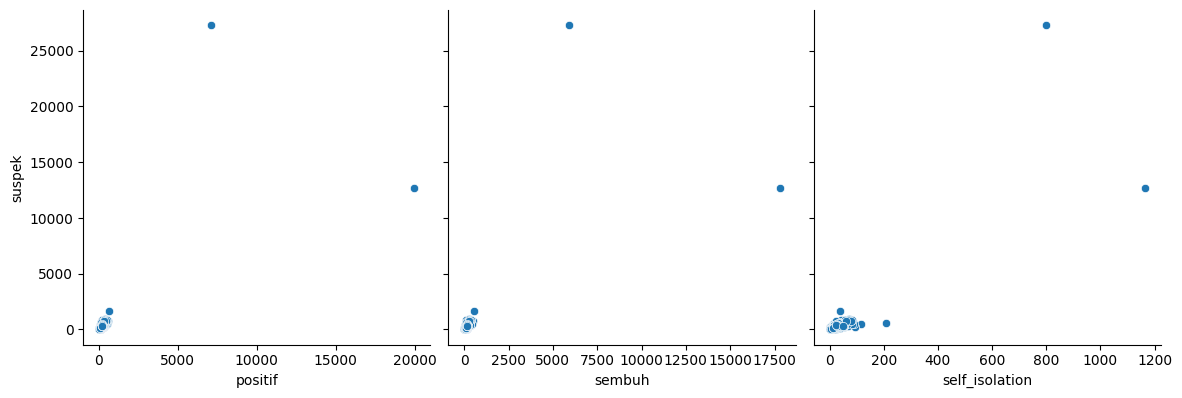

In [124]:
# operasi visualisasi
sns.pairplot(data, x_vars=['positif', 'sembuh','self_isolation'], 
             y_vars='suspek', height=4, aspect=1, kind='scatter')
plt.show()

output di atas kurang bisa menunjukkan korelasi antar data dalam x dengan data dalam y. Salah satu solusinya adalah menggunakan heatmap

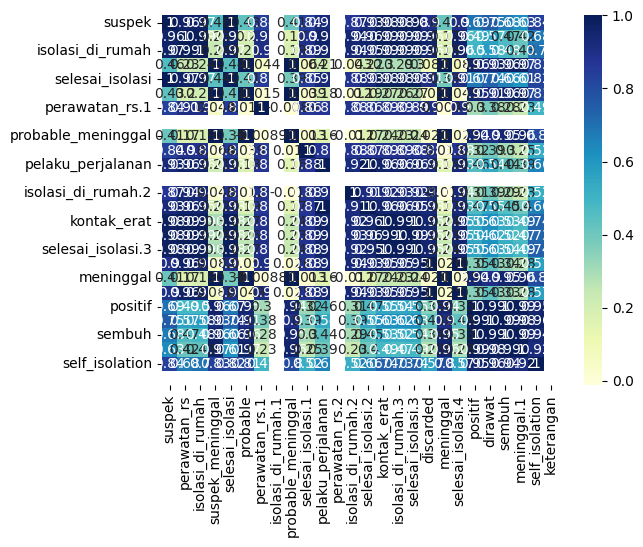

In [125]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

dari bentuk visualisasi di atas terlihat bahwa Length of Membership memiliki korelasi yang paling kuat terhadap Yearly Amount Spent

### Regresi Linier

In [126]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X = data['self_isolation']
y = data['suspek']

In [127]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)


In [128]:
# hasil training dtaset
X_train
y_train

11     298
15     236
128    181
25     570
81     552
      ... 
226     57
66     241
53     178
79     166
8      337
Name: suspek, Length: 188, dtype: int64

In [129]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

In [130]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const            -212.911014
self_isolation     17.768359
dtype: float64

In [131]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 suspek   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     439.8
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           6.93e-51
Time:                        13:46:06   Log-Likelihood:                -1596.3
No. Observations:                 188   AIC:                             3197.
Df Residuals:                     186   BIC:                             3203.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -212.9110     93.752     -2.271      0.024    -397.866     -27.956
self_isolation    17.7684      0.847     20.970      0.000      16.097      19.440
==============================================================================
Omnibus:                      276.042   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68471.527
Skew:                           5.972   Prob(JB):                         0.00
Kurtosis:                      95.728   Cond. No.                         120.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

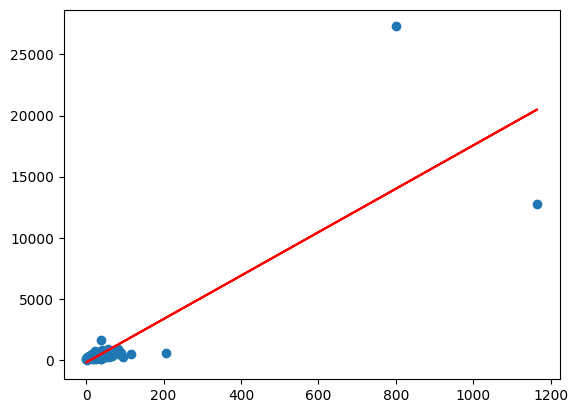

In [132]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, -212.911014 + 17.768359*X_train, 'r')
plt.show()

### Residual Analysis
dipakai untuk mengetahui tingkat error dari variabel yang dipengaruhi (y)

Error = Actual y value - y predicted value

In [133]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

C:\Users\Laudry\AppData\Local\Temp\ipykernel_6640\576177224.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


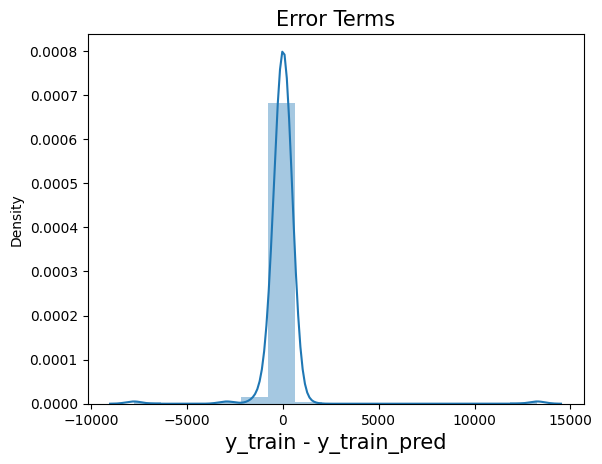

In [134]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

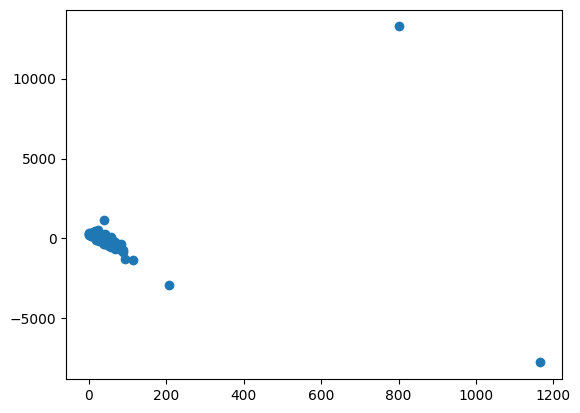

In [135]:
plt.scatter(X_train,res)
plt.show()

In [136]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

191    942.032348
112     18.077658
62     337.908128
261    835.422191
224   -195.142655
dtype: float64

In [137]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

-0.14408530078055137

perlu diperhatikan bahwa r^2 dari data trainign adalah 0.703 sedangkan dari data testing adalah -0.144. Hal ini berarti model yang dibentuk cukup stabil (tidak berselisih jauh antara training dengan testing)

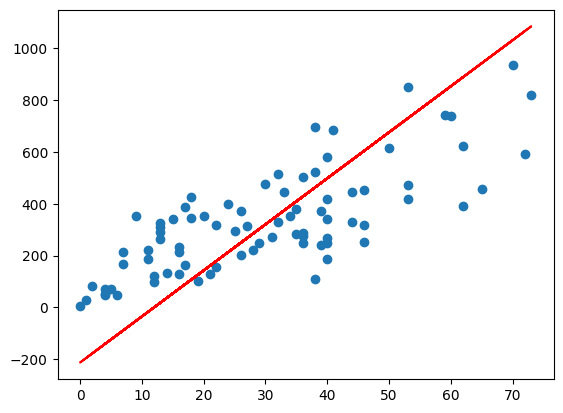

In [138]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()